<a href="https://colab.research.google.com/github/ogwora/core_m1_prj_week5/blob/master/Data_Dredgers_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stroke Analysis by Data Dredgers

##Defining the Question

###Specifying the Question

Is age a contributing factor to the risk of getting a stroke?

###Defining the Metric for Success

To find out if there is enough evidence to show that the claim is true, given the null hypothesis is true

###Understanding the Context

According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths. Stroke is also the third major cause of disability and a leading cause of dementia and depression.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

###Recording the Experimetal Design

1. To define the null and alternative hypothesis

2. Find and deal with outliers and other anomalies such as missing data and duplicates

3. Perform exploratory data analysis on the dataset. We will do univariate and bivariate analysis.

4. Perform hypothesis testing

5. Draw a conclusion

6. Make recommendations

###Data Relevance

The data is relevant for our research question which is to check whether the risk of getting a stroke is the same among all age groups. It contains the following info; a unique patient id, gender and age of the patient, if they have hypertension or a heart disease, their marital status, work type, type of residence, average glucose level, their bmi and smoking status.


##Reading the Data

###Importing our libraries

In [ ]:
#Importing the python libraries that we will need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Loading the uploaded dataset to our working environment
stroke=pd.read_csv('/content/healthcare-dataset-stroke-data.csv',index_col=0)
stroke
#Previewing the first rows
stroke.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
#Previewing the last rows
stroke.tail()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


## Checking the Data

In [ ]:
#Checking the shape of the dataset
stroke.shape

(5110, 11)

In [ ]:
#Checking the data types
stroke.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

## External Data Source Validation

The dataset we are using was downloaded from Kaggle. We validated the data by checking the WHO statistics where the data was extracted from. 

##Tidying the Dataset

###Converting the columns names to lowercase

In [ ]:
#Pre-processing 1
#Converting the columns names to lowercase
stroke.columns=map(str.lower,stroke.columns)
stroke

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0


### Removing white spaces

In [ ]:
#Pre-processing 2
#Removing  white spaces
stroke.columns=stroke.columns.str.strip().str.replace(' ','_')
stroke.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

###Missing values

In [ ]:
#Pre-processing
#Missing data
stroke.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
#Dealing with missing values using mean imputation
missing_col=['bmi']
for i in missing_col:
 stroke.loc[stroke.loc[:,i].isnull(),i]=stroke.loc[:,i].mean()

In [ ]:
#Veryfying that we no longer have missing values
stroke.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

###Duplicates

In [ ]:
#Checking for duplicates
stroke.duplicated().any()

False

In [ ]:
#checking infomation about the dataset
stroke.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5110 entries, 9046 to 44679
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 479.1+ KB


###Outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

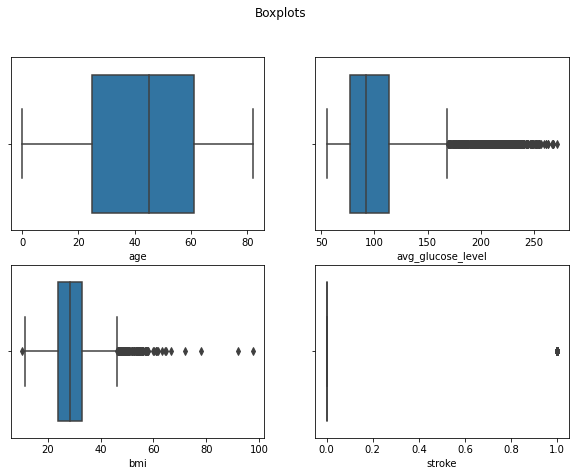

In [ ]:
#Finding outliers
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(10, 7))
fig.suptitle('Boxplots')
sns.boxplot(stroke['age'], ax=ax1)
sns.boxplot(stroke['avg_glucose_level'], ax=ax2)
sns.boxplot(stroke['bmi'], ax=ax3)
sns.boxplot(stroke['stroke'], ax=ax4)
plt.show()

In [ ]:
stroke.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

##Exporting the cleaned dataset

In [ ]:
#Exporting the Clean Dataset
stroke.to_csv('stroke.csv')

In [ ]:
stroke_df=pd.read_csv('stroke.csv',index_col=0)
stroke_df

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0


In [ ]:
stroke_df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

##Exploraty Data Analysis: Univariate Analysis


### Categorical Variables 

#### Bar Charts

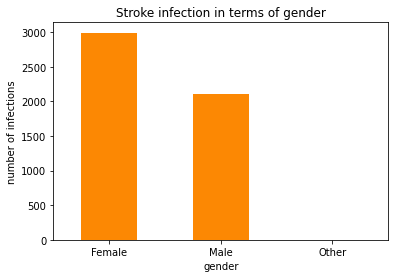

In [ ]:
#creating a bar chat
#Distribution of the gender population
stroke_df=pd.read_csv('stroke.csv')
stroke_df.gender.value_counts().plot.bar(rot=0,color='#fc8803')

plt.xlabel('gender')
plt.ylabel('number of infections')
plt.title('Stroke infection in terms of gender')
plt.show()
#The female gender is more likely to acquire stroke


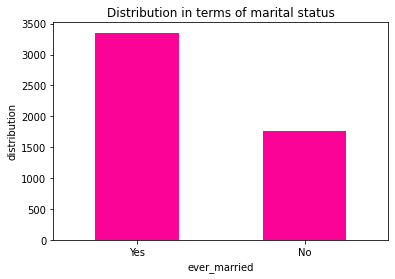

In [ ]:
#Bar Chart of Marital Status
stroke_df=pd.read_csv('stroke.csv')
stroke_df.ever_married.value_counts().plot.bar(rot=0,color='#fc0398')

plt.xlabel('ever_married')
plt.ylabel('distribution')
plt.title('Distribution in terms of marital status')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


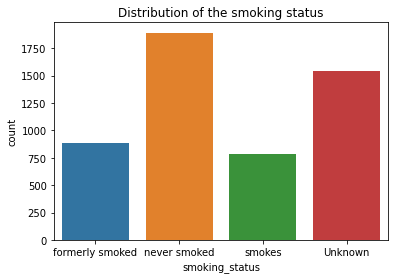

In [ ]:
#distribution of the smoking status
sns.countplot(stroke_df['smoking_status'])
plt.title('Distribution of the smoking status')
plt.show()

####Frequency Tables

In [ ]:
#Frequency Table for Smoking Status
stroke_df['smoking_status'].value_counts().to_frame()

,smoking_status
never smoked,1892
Unknown,1544
formerly smoked,885
smokes,789


In [ ]:
#Frequency Table for marital status
stroke_df['ever_married'].value_counts().to_frame()

,ever_married
Yes,3353
No,1757


In [ ]:
#Frequency Table for Gender
stroke_df['gender'].value_counts().to_frame()

,gender
Female,2994
Male,2115
Other,1


###Numerical Variables

####Histograms

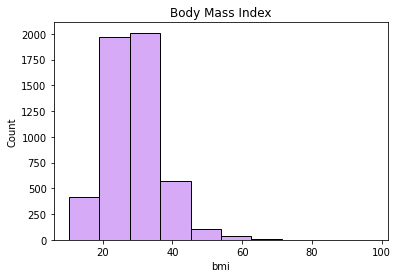

In [ ]:
#distribution of the bmi level in the population
sns.histplot(x='bmi', data=stroke_df,color='#ca8ef5',bins=10)
plt.title('Body Mass Index')
plt.show()

Text(0.5, 1.0, 'Age distribution')

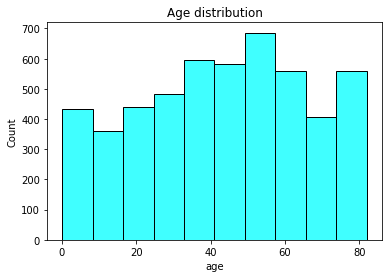

In [ ]:
#distribution of age in the population
sns.histplot(x='age', data=stroke_df,color='cyan',bins=10)
plt.title('Age distribution')

####Pie Charts

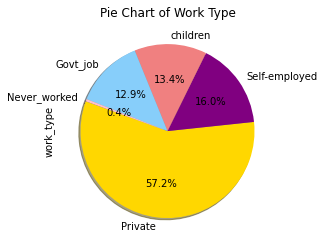

In [ ]:
#pie chart representation of the work type distribution
colors = ['gold', 'purple', 'lightcoral', 'lightskyblue', 'pink']
stroke_df['work_type'].value_counts().plot.pie(autopct='%1.1f%%', colors=colors, 
                                               shadow = True, startangle = 160)
plt.title('Pie Chart of Work Type')
plt.show()

####Bar Charts

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


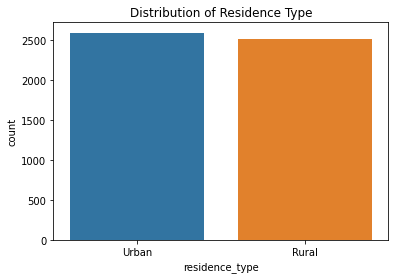

In [ ]:
#distribution of the population in terms of the residence type
sns.countplot(stroke_df['residence_type'])
plt.title('Distribution of Residence Type')
plt.show()

####Measures of Central Tendency

In [ ]:
#Finding the mean of the numerical variables

stroke_df[["age","avg_glucose_level","bmi"]].mean()

age                   43.226614
avg_glucose_level    106.147677
bmi                   28.893237
dtype: float64

In [ ]:
#Finding the median of the numerical variables
stroke_df[["age","avg_glucose_level","bmi"]].median()

age                  45.000
avg_glucose_level    91.885
bmi                  28.400
dtype: float64

In [ ]:
#Finding the mode of the numerical variables
stroke_df[["age","avg_glucose_level","bmi"]].mode()

,age,avg_glucose_level,bmi
0,78.0,93.88,28.893237


####Measures of dispersion

In [ ]:
#Finding the standard deviation
stroke_df[["age","avg_glucose_level","bmi"]].std()

age                  22.612647
avg_glucose_level    45.283560
bmi                   7.698018
dtype: float64

In [ ]:
#Finding the variance
stroke_df[["age","avg_glucose_level","bmi"]].var()

age                   511.331792
avg_glucose_level    2050.600820
bmi                    59.259478
dtype: float64

In [ ]:
#The quartiles
stroke_df[["age","bmi"]].quantile([0.25,0.5,0.75])


,age,bmi
0.25,25.0,23.8
0.50,45.0,28.4
0.75,61.0,32.8


In [ ]:
#Skewness
stroke_df[["age","avg_glucose_level","bmi"]].skew()
#'Age' is negatively skewed.This indicates that the distribution is skewed to the left.(The mean is less than the mode).
#"Avg glucose level and bmi" are positively skewed.

age                 -0.137059
avg_glucose_level    1.572284
bmi                  1.076716
dtype: float64

In [ ]:
#Kurtosis
stroke_df[["age","avg_glucose_level","bmi"]].kurt()
#'bmi' is leptokurtic. 

age                 -0.991010
avg_glucose_level    1.680479
bmi                  3.623061
dtype: float64

In [ ]:
#Description of the numerical variables
stroke_df.describe()


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


##Exploraty Data Analysis: Bivariate Analysis

###Numerical and Numerical

####Pair Plots

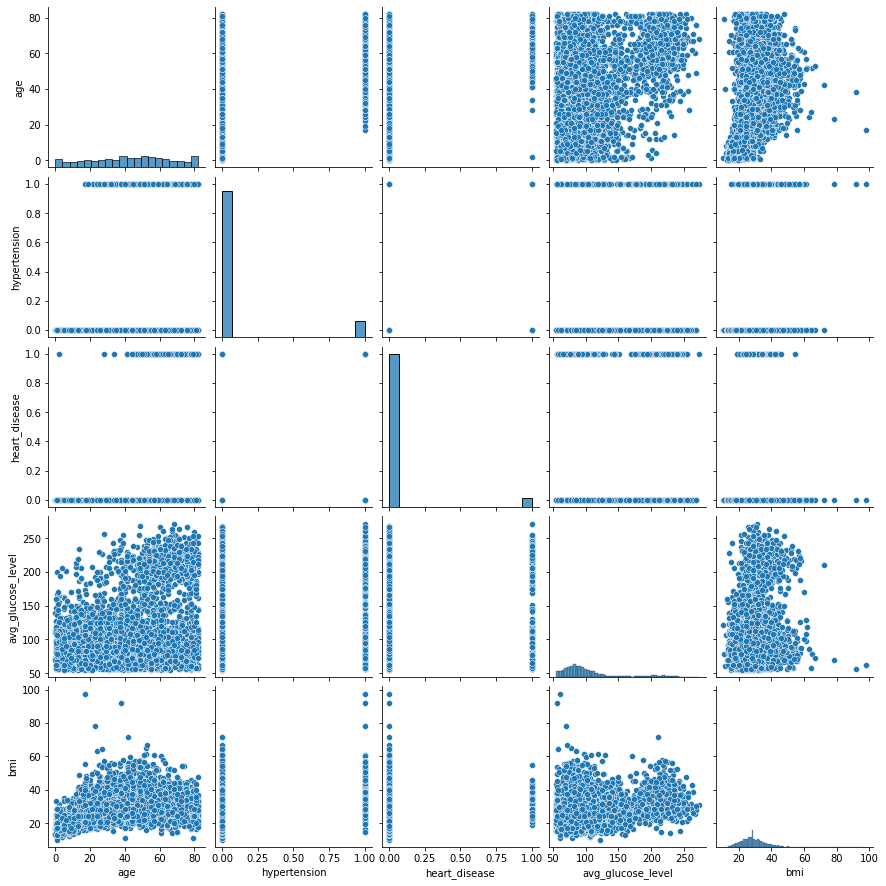

In [ ]:
#plotting a scatter plot for the various numerical variables
sns.pairplot(stroke_df.iloc[: , 1:-1])


####Line Plots

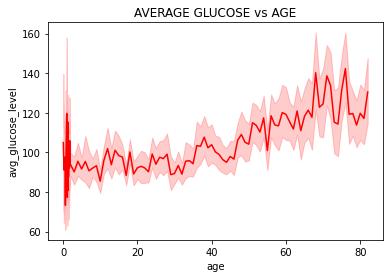

In [ ]:
#line plot indicating the glucose level with age
sns.lineplot(x ='age', data=stroke_df, y = 'avg_glucose_level',color='red')
plt.title('AVERAGE GLUCOSE vs AGE')
plt.show()
#as the age increases the glucose level also increases
#there is a positive corelation between the two variables

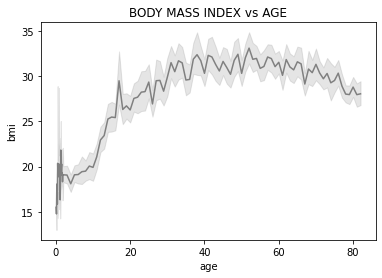

In [ ]:
#lineplot indicating body mass index with age
sns.lineplot(x ='age', data=stroke_df, y = 'bmi',color=('grey'))
plt.title('BODY MASS INDEX vs AGE')
plt.show()
#The bmi increases with age upto around age 50 when it gradually starts to drop

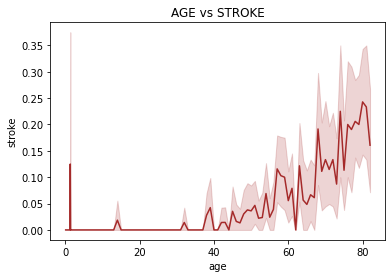

In [ ]:
#Chances of acquiring a stroke in relation to age
sns.lineplot(x ='age', data=stroke_df, y = 'stroke',color=('brown'))
plt.title('AGE vs STROKE')
plt.show()
#when one reaches a particular age,roughly 50 and above chances of getting a stroke also increases 

Text(0.5, 1.0, 'Hypertension vs Stroke')

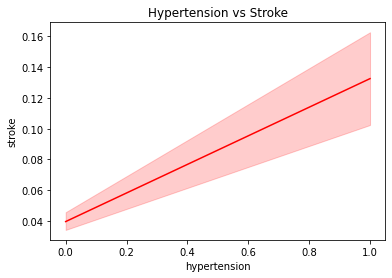

In [ ]:
#How does hypertension relate to stroke?
sns.lineplot(x ='hypertension', data=stroke_df, y = 'stroke',color=('red'))
plt.title('Hypertension vs Stroke')
#the is a positive correlation between stroke and hypertension

Text(0.5, 1.0, 'Heart disease vs Stroke')

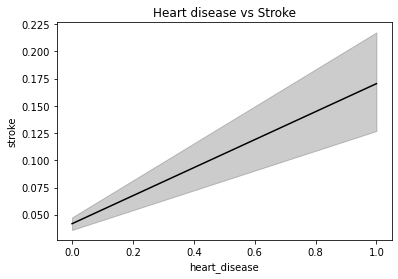

In [ ]:
#heart disease in relation with stroke
sns.lineplot(x ='heart_disease', data=stroke_df, y = 'stroke',color=('black'))
plt.title('Heart disease vs Stroke')
#as the heart disease increases the chance of acquiring a stroke also increases

####Correlation

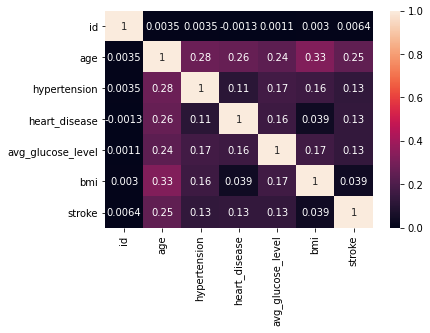

In [ ]:
#Plotting a heat map
sns.heatmap(stroke_df.corr(),annot=True)
plt.show()

###Categorical and Numerical

####Bar Charts

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Marital status VS Stroke')

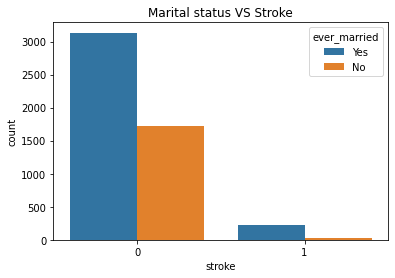

In [ ]:
sns.countplot('stroke', hue='ever_married', data=stroke_df)
plt.title('Marital status VS Stroke')
#Married couples form the largest part of the population
#couples in marriage are more likely to have stroke

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Smoking status in relation to stroke')

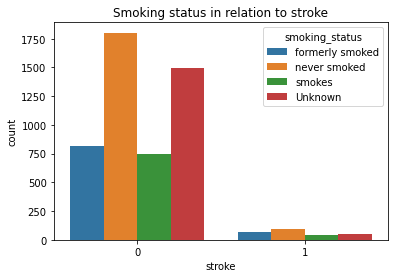

In [ ]:
#how the smoking status affects chances of getting a stroke
sns.countplot('stroke', hue='smoking_status', data=stroke_df)
plt.title('Smoking status in relation to stroke')
#individuals who never smoked have a higher likelyhood of getting stroke


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'GENDER vs STROKE')

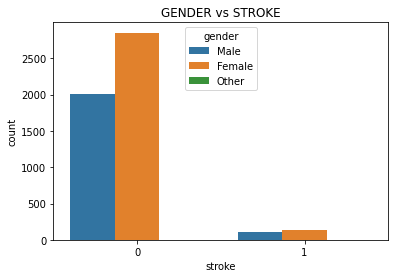

In [ ]:
#Association of gender with stroke
sns.countplot('stroke', hue='gender', data=stroke_df)
plt.title('GENDER vs STROKE')
#Female gender form the majority of the population and are most likely to get stroke

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Work type in relation with Stroke')

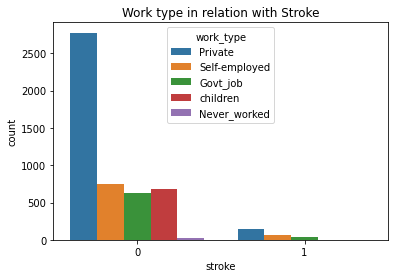

In [ ]:
#distribution of stroke complication in relation with type of work
sns.countplot('stroke', hue='work_type', data=stroke_df)
plt.title('Work type in relation with Stroke')
#the population is made up of more people in the private work type

##Exploratory Data Analysis: Multivariate Analysis

###Principal Component Analysis

In [ ]:
#Using Label Encoder to convert the categorical columns 
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
label_encoder.fit(stroke_df['gender'])
stroke_df['gender']=label_encoder.transform(stroke_df['gender'])
label_encoder.fit(stroke_df['ever_married'])
stroke_df['ever_married']=label_encoder.transform(stroke_df['ever_married'])
label_encoder.fit(stroke_df['work_type'])
stroke_df['work_type']=label_encoder.transform(stroke_df['work_type'])
label_encoder.fit(stroke_df['residence_type'])
stroke_df['residence_type']=label_encoder.transform(stroke_df['residence_type'])
label_encoder.fit(stroke_df['smoking_status'])
stroke_df['smoking_status']=label_encoder.transform(stroke_df['smoking_status'])
stroke_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,1,2,1,83.75,28.893237,2,0
5106,44873,0,81.0,0,0,1,3,1,125.20,40.000000,2,0
5107,19723,0,35.0,0,0,1,3,0,82.99,30.600000,2,0
5108,37544,1,51.0,0,0,1,2,0,166.29,25.600000,1,0


In [ ]:
#Step 1:
#Dividing the dataset into a feature set and corresponding labels
X = stroke_df.drop('stroke', 1)
y = stroke_df['stroke']

In [ ]:
#Step 2:
#Splitting the dataset into training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
#Step 3:Normalization
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#Step 3:Applying PCA
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
#Step4:Explained Variance Ratio
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.23641483, 0.11479115, 0.09104605, 0.09098337, 0.08565826,
       0.08317175, 0.07597781, 0.07371471, 0.06430153, 0.0572411 ,
       0.02669944])

In [ ]:
#Step5:Using 1 Principal Component
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
#Step6:Training and making predictions
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:
#Step7:Performance Evaluations
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))


[[968   0]
 [ 54   0]]
Accuracy 0.9471624266144814


In [ ]:
#Step8:Prediction Results
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))
#This predicts a 94.716% accuracy

[[968   0]
 [ 54   0]]
Accuracy 0.9471624266144814


##Sampling

###Stratified sampling 

In [ ]:
#Stratified sample
strat_output = stroke_df.groupby('gender', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.1))

# Check the stratified output
print(strat_output)

         id  gender   age  ...   bmi  smoking_status  stroke
652   43174       0  56.0  ...  40.5               1       0
3068   9160       0  80.0  ...  26.0               2       0
3878  16079       0  67.0  ...  31.8               0       0
4193  59126       0  27.0  ...  25.1               0       0
4196  52447       0   3.0  ...  14.1               0       0
...     ...     ...   ...  ...   ...             ...     ...
885   47885       1  37.0  ...  31.9               1       0
4753  61881       1  56.0  ...  31.2               3       0
3349  12022       1  37.0  ...  35.7               3       0
730   11176       1   9.0  ...  16.3               0       0
2766  59359       1  79.0  ...  25.2               2       0

[511 rows x 12 columns]


###Simple Random Sampling

In [ ]:
#Using simple random sampling to select our samples from the dataset
sample_df = stroke_df.sample(n = 511, replace="False")
print(sample_df)


         id  gender   age  ...   bmi  smoking_status  stroke
5020   6278       1   5.0  ...  17.6               0       0
3280  22939       0  22.0  ...  29.3               0       0
4703   8037       1  44.0  ...  34.4               0       0
3833  51693       0  52.0  ...  35.8               2       0
1658  48072       0  53.0  ...  28.5               0       0
...     ...     ...   ...  ...   ...             ...     ...
5042  40220       1  32.0  ...  26.2               1       0
4633  72289       0  44.0  ...  43.2               3       0
4297  50410       0  78.0  ...  34.6               2       0
2858  55462       1   6.0  ...  15.2               0       0
279   67210       1  27.0  ...  25.0               0       0

[511 rows x 12 columns]


##Hypothesis Testing

###Null and Alternative Hypotheses



Null Hypothesis: .Individuals between the age of 75-79 have the highest risk of getting a stroke


Alternative Hypothesis: Risk of getting a stroke is evenly distributed among all age groups.

###Level of Significance

We will use a level of significance of 5%




###Calculating the Test Statistic

In [ ]:
#importing libraries

import math
import scipy.stats as stats
from scipy.stats import norm
import statsmodels.stats.api as sms

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#Finding the mean of the sample
sample_df['age'].mean()

45.866223091976515

In [ ]:
sample_df['age'].value_counts()

44.00    17
51.00    14
5.00     11
79.00    11
64.00    11
         ..
1.64      1
0.88      1
1.24      1
1.00      1
1.16      1
Name: age, Length: 90, dtype: int64

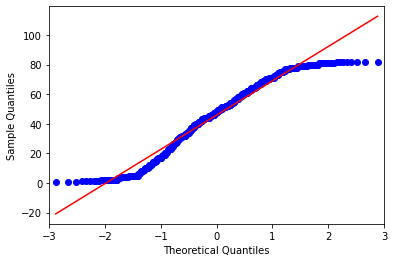

In [ ]:
#Checking whether our sample is normally distributed
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
qqplot(sample_df['age'], line = 's')
pyplot.show()


In [ ]:
zscore = (43.627 - 43.2266)/ 22.6126
print("Z score: ", zscore)
prob = norm.cdf(zscore)
print("P value: ", prob)
print("Since the p value is greater than 0.05, we fail to reject the null hypothesis that Individuals between the age of 75-79 have the highest risk of getting a stroke")

Z score:  0.017706942147298618
P value:  0.5070636787578888
Since the p value is greater than 0.05, we fail to reject the null hypothesis that Individuals between the age of 75-79 have the highest risk of getting a stroke


##Conclusions

We concluded that the risk of getting a stroke is not the same in all age groups. It is evident that stroke mostly affects the older generation especially those between the age of 75-79 years.




##Recommendation

We recommend that people of the old age, especially those who fall under the age bracket of 75-79 should:
- Get access to quality food and practice of proper dietary habits.
- Be given access to quality health care (Medication/physiotherapy/speach therapy/etc).
- Have a healthy working environment.
- Belong to social support systems to avoid being alone and depressed.
-Avoid stroke triggering activities like smoking. 